# Backpack Prediction Challenge

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [144]:
train_datasets = pd.read_csv("../Data/train.csv")
test_datasets = pd.read_csv("../Data/test.csv")


In [145]:
# train_datasets.info()
# train_datasets.isnull()

# test_datasets.isnull().sum()
# train_datasets['Brand'].unique()
# train_datasets['Material'].unique()
# train_datasets['Size'].unique()
# train_datasets['Laptop Compartment'].unique()
# train_datasets['Waterproof'].unique()
# train_datasets['Style'].unique()
# train_datasets['Color'].unique()
# train_datasets['Weight Capacity (kg)'].unique()

# train_datasets['Color'].mode()[0]
# train_datasets['Weight Capacity (kg)'].mean()


In [146]:
# dealing with numerical columns, it might be better to use median (for robustness against outliers) instead of mean.

def fill_na(columns, type):
    if type == 'categorical':
        for col in columns:
            train_datasets[col] = train_datasets[col].fillna(train_datasets[col].mode()[0])
            test_datasets[col] = test_datasets[col].fillna(test_datasets[col].mode()[0])
    else:
        for col in columns:
            if col != 'Price':
                train_datasets[col] = train_datasets[col].fillna(train_datasets[col].median())
                test_datasets[col] = test_datasets[col].fillna(test_datasets[col].median())

In [147]:
# fill_na()

cat_cols = [col for col in train_datasets.columns if train_datasets[col].dtype == 'object']
num_cols = [col for col in train_datasets.columns if train_datasets[col].dtype != 'object']

fill_na(columns=cat_cols, type='categorical')
fill_na(columns=num_cols, type='numerical')

# Another way to get the num and cat cols
train_datasets.select_dtypes(exclude='object').columns
train_datasets.select_dtypes(include='object').columns

Index(['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof',
       'Style', 'Color'],
      dtype='object')

In [148]:
train_datasets['Laptop Compartment'] = train_datasets['Laptop Compartment'].map({'Yes': 1, 'No': 0})
train_datasets['Waterproof'] = train_datasets['Waterproof'].map({'Yes': 1, 'No': 0})
test_datasets['Laptop Compartment'] = test_datasets['Laptop Compartment'].map({'Yes': 1, 'No': 0})
test_datasets['Waterproof'] = test_datasets['Waterproof'].map({'Yes': 1, 'No': 0})

In [149]:
train_datasets.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1,0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1,1,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1,0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1,0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1,1,Messenger,Green,17.749338,86.02312


In [150]:
# train_datasets.to_csv('../Data/cleaned_train_data.csv', index=False)
test_datasets.to_csv('../Data/cleaned_test_data.csv', index=False)

In [151]:
print(train_datasets['Brand'].unique())
print(train_datasets['Material'].unique())
print(train_datasets['Size'].unique())
print(train_datasets['Style'].unique())
print(train_datasets['Color'].unique())

['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma']
['Leather' 'Canvas' 'Nylon' 'Polyester']
['Medium' 'Small' 'Large']
['Tote' 'Messenger' 'Backpack']
['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink']


In [152]:
train_datasets['Price']

# train_datasets.drop(columns=['Price'], axis=1).head()
train_datasets.head()
# test_datasets['Price']
# print(train_datasets.columns)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1,0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1,1,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1,0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1,0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1,1,Messenger,Green,17.749338,86.02312


In [153]:
from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()
train_datasets['Size'] = lc.fit_transform(train_datasets['Size'])
test_datasets['Size'] = lc.transform(test_datasets['Size'])

In [154]:
test_datasets.head()
test_datasets['Size'].value_counts()

Size
1    72156
0    65684
2    62160
Name: count, dtype: int64

In [155]:
# create pipeline for encoding the data
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


numeric_columns = train_datasets.select_dtypes(exclude='object').columns   # numerical columns for standardization
categorical_cols_nominal = ['Brand', 'Material', 'Style', 'Color']  # Nominal categorical features
categorical_cols_ordinal = ['Size']  # Ordinal categorical features


# encoding the cat cols
transformer = ColumnTransformer(
    [
        ('nominal_cols_encoding', OneHotEncoder(drop='first'), categorical_cols_nominal),
        ('standardization', StandardScaler(), numeric_columns),
    ], remainder='passthrough'   # any of features don't delete 
)

# Create a pipeline to preprocess the data
pipeline = Pipeline(
    steps=[
        ('preprocessor', transformer)
    ]
)

# separate the dependent and indepedent columns for the train dataset
X_train = train_datasets.drop(columns=['Price'], axis=1)
y_train = train_datasets['Price']

# Fit and transform the training data and test data
# X_train = pipeline.fit_transform(X_train)
# test_datasets = pipeline.transform(test_datasets)


In [156]:
train_datasets.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,1,7.0,1,0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,2,10.0,1,1,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,2,2.0,1,0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,2,8.0,1,0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,1,1.0,1,1,Messenger,Green,17.749338,86.02312


In [157]:
print(train_datasets.columns.tolist())

['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']


In [158]:
train_datasets.columns = train_datasets.columns.str.replace("'", "", regex=True)
# print(train_datasets.columns.tolist())
# print([repr(col) for col in train_datasets.columns])

# Visualization


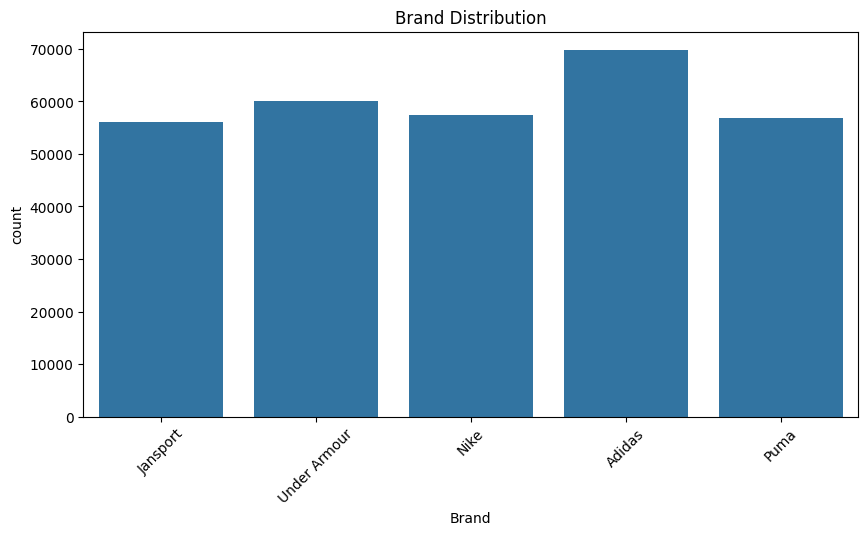

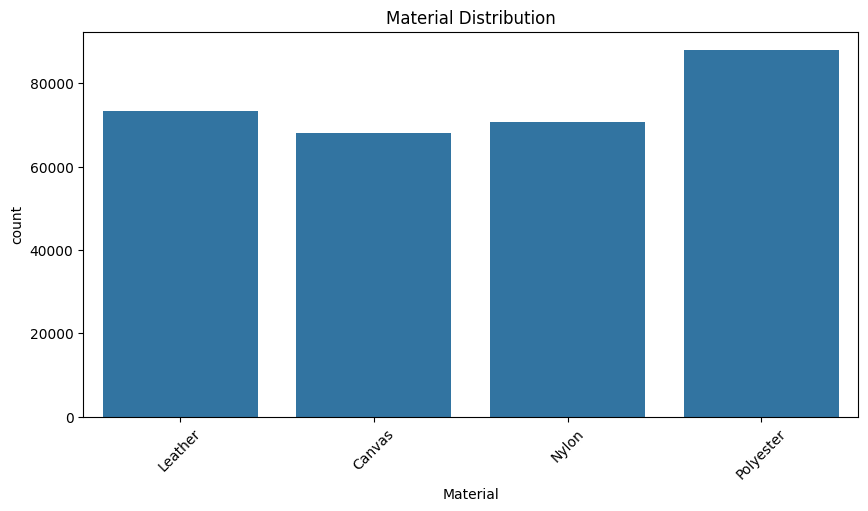

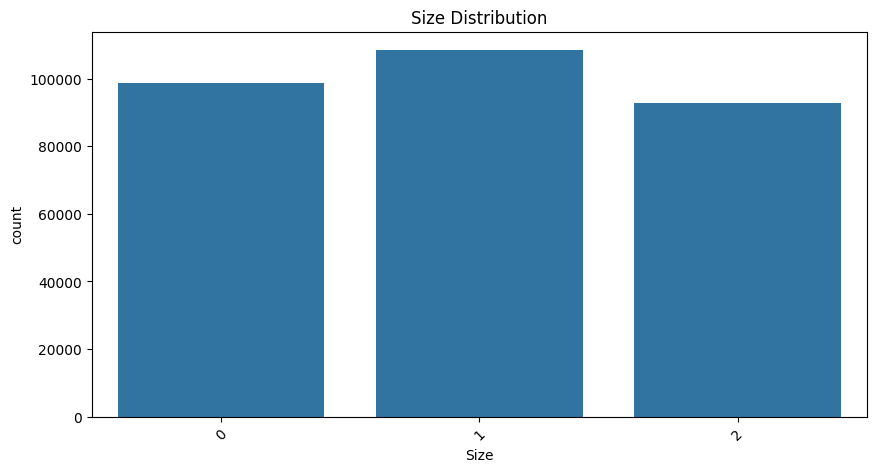

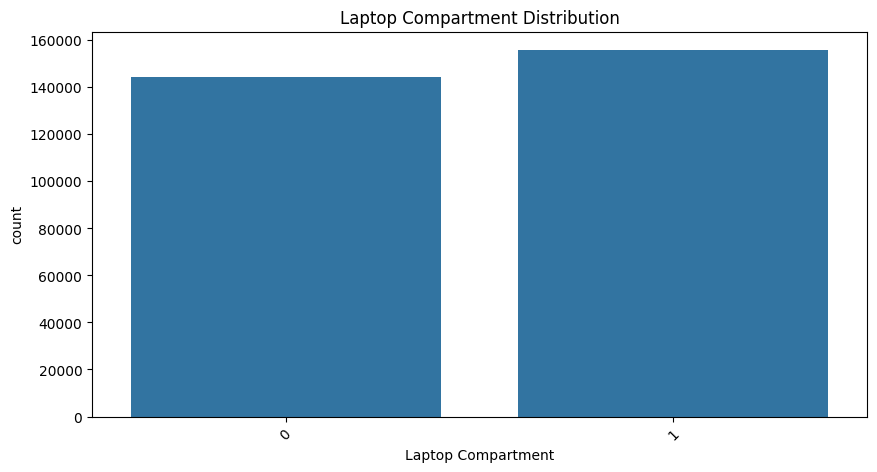

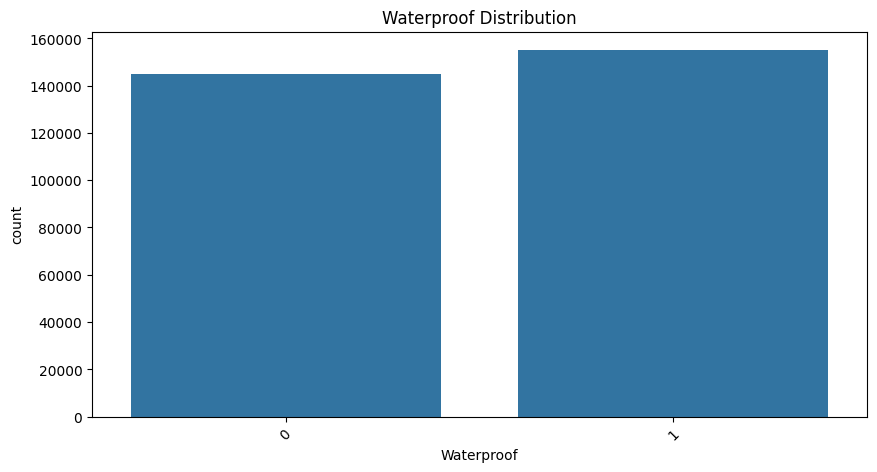

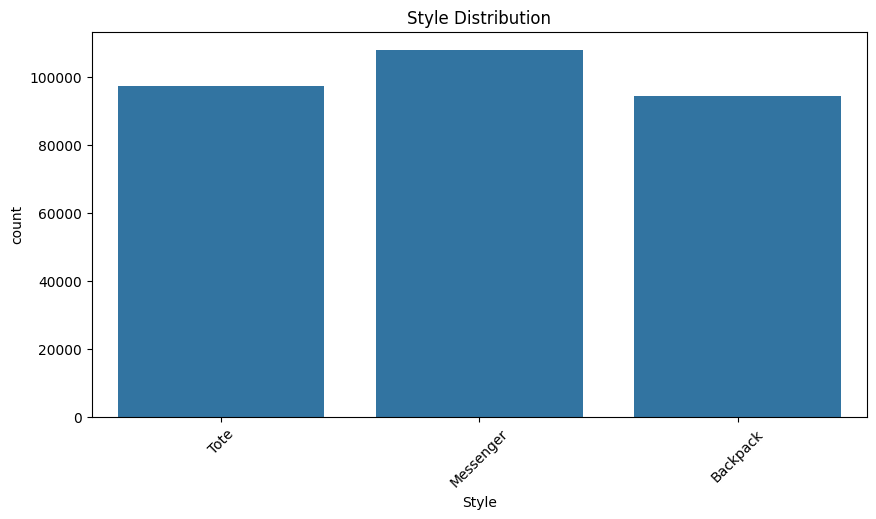

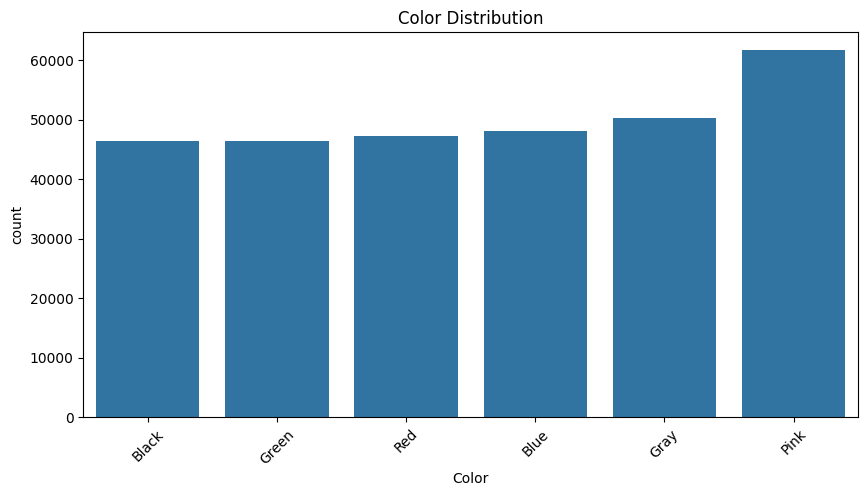

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=train_datasets[col])
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.title(f"{col} Distribution")
    plt.show()


<Figure size 2000x500 with 0 Axes>

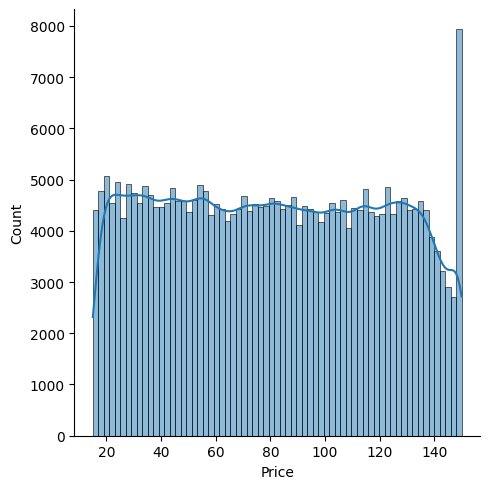

In [160]:
plt.figure(figsize=(20,5))
sns.displot(train_datasets['Price'], kde=True)
plt.show()

In [161]:
train_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 300000 non-null  object 
 2   Material              300000 non-null  object 
 3   Size                  300000 non-null  int64  
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    300000 non-null  int64  
 6   Waterproof            300000 non-null  int64  
 7   Style                 300000 non-null  object 
 8   Color                 300000 non-null  object 
 9   Weight Capacity (kg)  300000 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 25.2+ MB


In [162]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
cat_cols = train_datasets.select_dtypes(include=['object']).columns


train_datasets[cat_cols] = encoder.fit_transform(train_datasets[cat_cols])
test_datasets[cat_cols] = encoder.transform(test_datasets[cat_cols])

# for col in train_datasets:
#     if train_datasets[col].dtype == 'object':
#         train_datasets[col] = encoder.fit_transform(train_datasets[col])
#         test_datasets[col] = encoder.transform(test_datasets[col])

In [163]:
train_datasets.info()
id = test_datasets['id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 300000 non-null  float64
 2   Material              300000 non-null  float64
 3   Size                  300000 non-null  int64  
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    300000 non-null  int64  
 6   Waterproof            300000 non-null  int64  
 7   Style                 300000 non-null  float64
 8   Color                 300000 non-null  float64
 9   Weight Capacity (kg)  300000 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 25.2 MB


In [164]:
test_datasets.isna().sum()
train_datasets.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [165]:
# train_datasets.to_csv('../Data/all_cleaned_train_data.csv')
# test_datasets.to_csv('../Data/all_cleaned_test_data.csv')

In [166]:
train_datasets.head()
# test_datasets.shape

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1.0,1.0,1,7.0,1,0,2.0,0.0,11.611723,112.15875
1,1,1.0,0.0,2,10.0,1,1,1.0,3.0,27.078537,68.88056
2,2,4.0,1.0,2,2.0,1,0,1.0,5.0,16.643760,39.17320
3,3,2.0,2.0,2,8.0,1,0,1.0,3.0,12.937220,80.60793
4,4,0.0,0.0,1,1.0,1,1,1.0,3.0,17.749338,86.02312


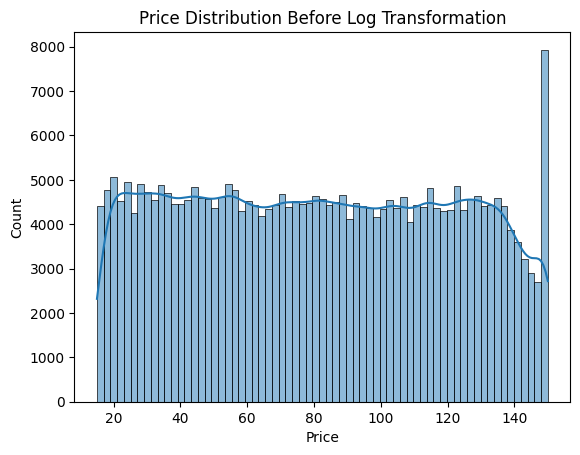

In [167]:
sns.histplot(train_datasets['Price'], kde=True)
plt.title('Price Distribution Before Log Transformation')
plt.show()

In [168]:
print(train_datasets['Price'].skew())  # Check skewness value

0.036882755131099065


In [169]:
train_datasets = train_datasets.drop(columns=['id'])
test_datasets = test_datasets.drop(columns=['id'])

In [170]:
X_train = train_datasets.drop(columns=['Price'])
y_train = train_datasets['Price']
X_test = test_datasets

In [171]:
# Split train dataset for validation (Optional but recommended)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [172]:
print(X_train.columns)
print(X_test.columns)


Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)'],
      dtype='object')
Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)'],
      dtype='object')


In [173]:
# Train the model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# print(f"Validation MAE: {mean_squared_error(y_test, y_pred):.4f}")

# mse = mean_squared_error(y_test, y_pred)

In [179]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

y_pred

array([81.65129255, 81.01062095, 80.84715604, ..., 82.20318577,
       82.10868033, 82.41728696], shape=(200000,))

In [180]:
submission = pd.DataFrame({
    'id': id,
    'Price': y_pred
})

submission.to_csv('../Data/submission_elasticnet.csv', index=False)

In [ ]:
test_datasets.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,3.0,1.0,2,2.0,0.0,0.0,2.0,3.0,20.671147
1,2.0,0.0,1,7.0,0.0,1.0,0.0,3.0,13.564105
2,0.0,0.0,0,9.0,0.0,1.0,1.0,1.0,11.809799
3,0.0,2.0,0,1.0,1.0,0.0,1.0,3.0,18.477036
4,2.0,2.0,0,2.0,1.0,1.0,2.0,0.0,9.907953
